In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [9]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
x = df[["Spending Score (1-100)","Annual Income (k$)"]]

In [16]:
x

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17
...,...,...
195,79,120
196,28,126
197,74,126
198,18,137


In [35]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [36]:
kmeans = KMeans(3)

In [37]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [38]:
l = kmeans.fit_predict(x)

In [41]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [49.82926829, 44.15447154],
       [18.63157895, 87.        ]])

In [44]:
kmeans.inertia_

106348.37306211118

In [46]:
list = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    inertia = kmeans.inertia_
    list.append(inertia)

In [47]:
list

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484346,
 30273.394312070042,
 25331.042318281477,
 21818.114588452176]

In [48]:
kmeans = KMeans(5)
kmeans.fit(x)
l = kmeans.fit_predict(x)

In [49]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

In [51]:
kmeans.inertia_

44448.45544793371

In [67]:
Test = pd.DataFrame({"Spending Score (1-100)":[80],"Annual Income (k$)":[100]})
predicted_cluster = kmeans.predict(Test)[0]
predicted_cluster

0

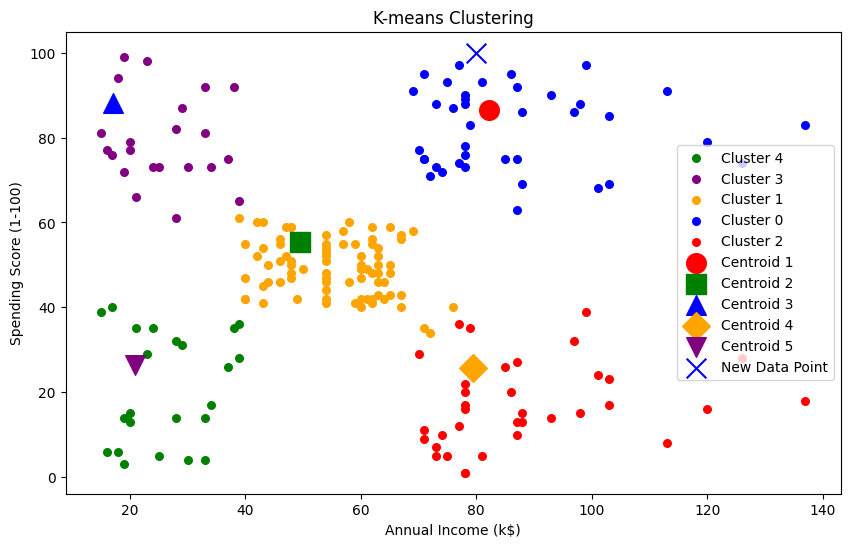

In [68]:
import matplotlib.pyplot as plt
predicted_labels = kmeans.labels_

data_with_labels = x.copy()
data_with_labels['Cluster'] = predicted_labels

centroid_markers = ['o', 's', '^', 'D', 'v'] 
centroid_colors = ['red', 'green', 'blue', 'orange', 'purple']  
cluster_colors = ['blue', 'orange', 'red', 'purple', 'green']

plt.figure(figsize=(10, 6))

for i, cluster_label in enumerate(data_with_labels['Cluster'].unique()):
    cluster_data = data_with_labels[data_with_labels['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], marker='o', label=f'Cluster {cluster_label}', color=cluster_colors[cluster_label], s=30)

centroids = kmeans.cluster_centers_
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker=centroid_markers[i], color=centroid_colors[i], s=200, label=f'Centroid {i + 1}')

plt.scatter(Test.iloc[[0],[0]], Test.iloc[[0],[1]], marker='x', color=cluster_colors[predicted_cluster], label='New Data Point', s=200)

plt.title('K-means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()